# Model-2:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("water.csv")

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data["Potability"].unique()

array([0, 1], dtype=int64)

In [6]:
data["Potability"].unique()

array([0, 1], dtype=int64)

In [7]:
data[data["Potability"]=='#NUM!']

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [8]:
data = data.drop(data[data["Potability"]=='#NUM!'].index)

In [9]:
data["Potability"].unique()

array([0, 1], dtype=int64)

In [10]:
data["Potability"] = data["Potability"].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [12]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [13]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
data =data.dropna()

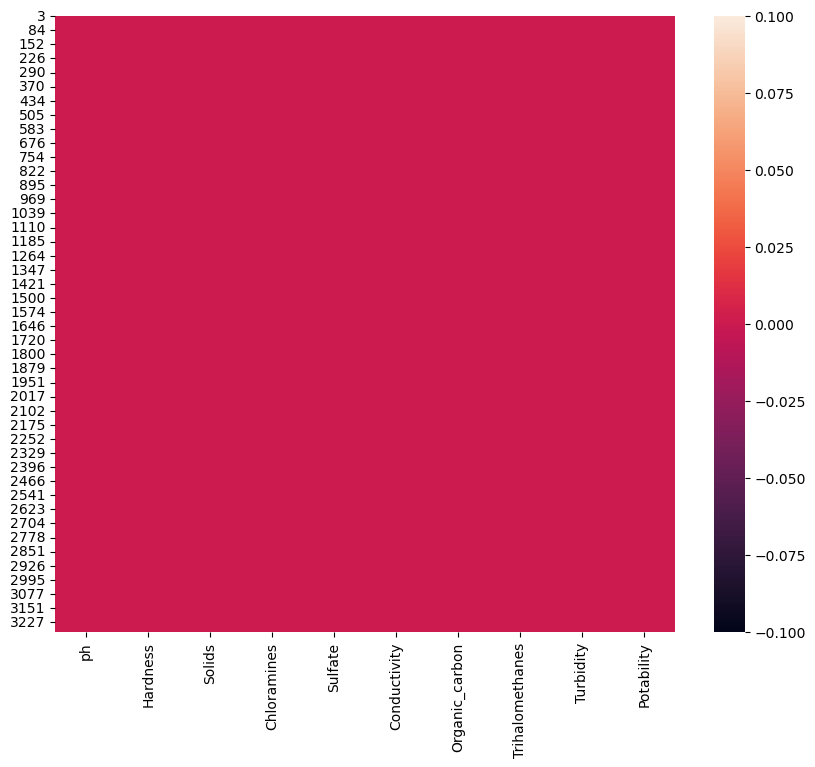

In [15]:
plt.figure(figsize= (10,8))
sns.heatmap(data.isnull())
plt.show()

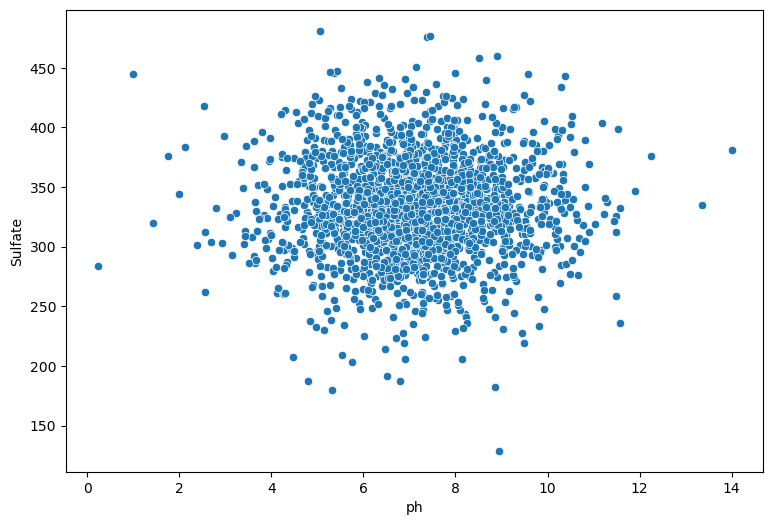

In [16]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data['ph'],y=data["Sulfate"])
plt.show()

<AxesSubplot:xlabel='Hardness', ylabel='Chloramines'>

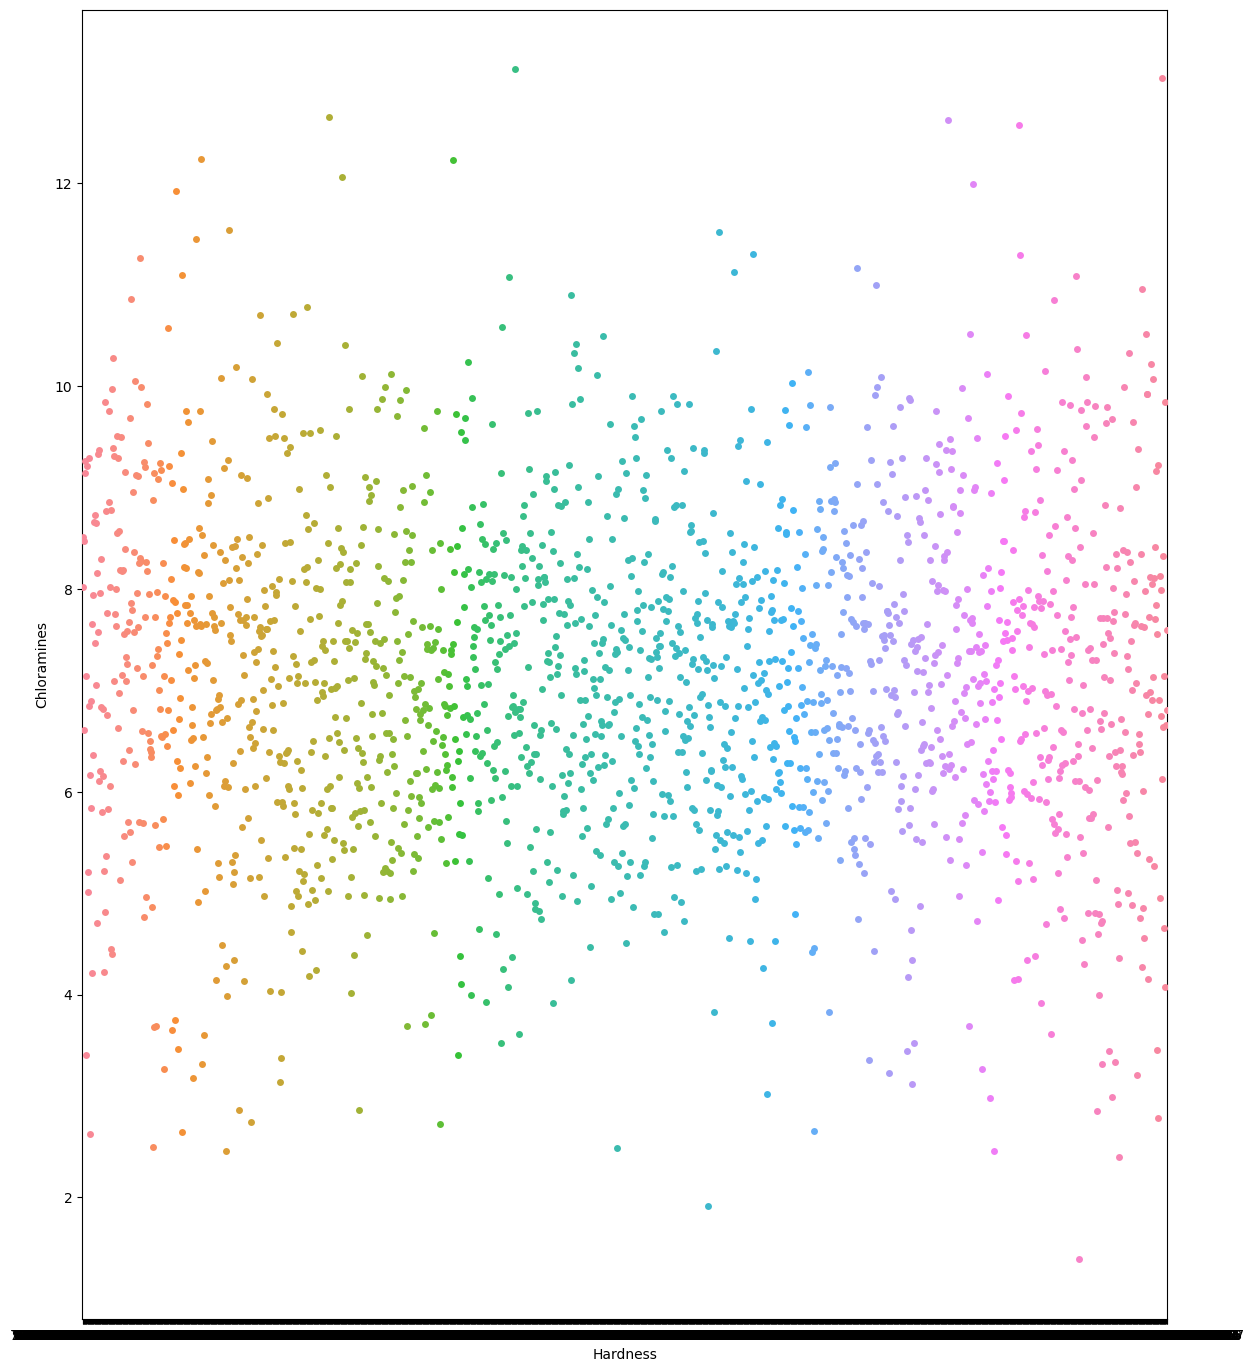

In [17]:
plt.figure(figsize = (14,17))
sns.stripplot(x = data["Hardness"], y = data["Chloramines"])

In [18]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

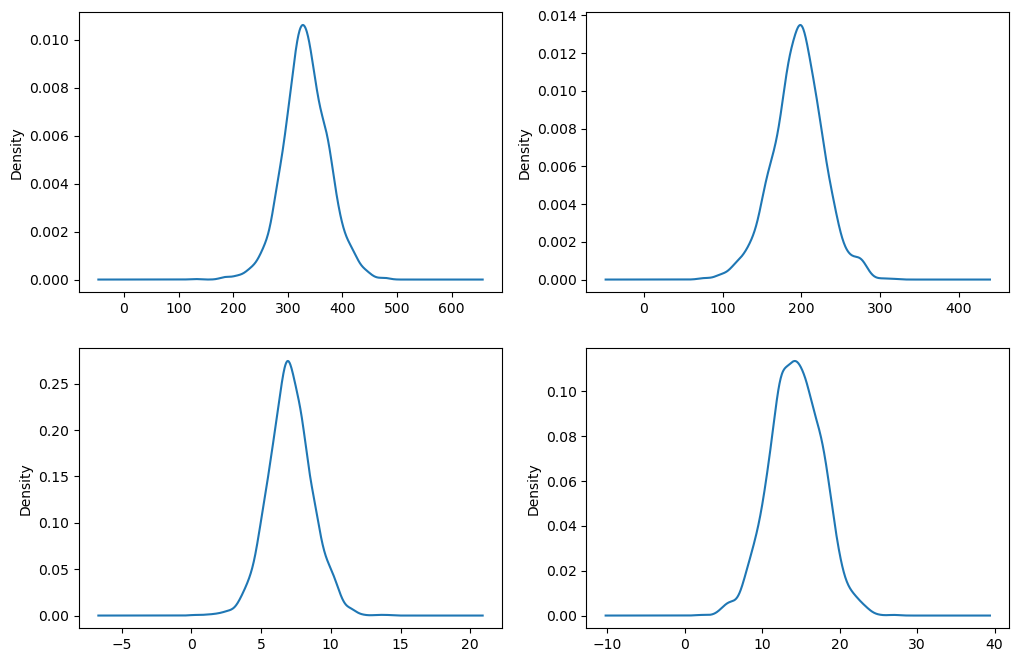

In [19]:
plt.figure(figsize= (12,8))
plt.subplot(2,2,1)
data["Sulfate"].plot(kind='density')
plt.subplot(2,2,2)
data["Hardness"].plot(kind='density')
plt.subplot(2,2,3)
data["ph"].plot(kind='density')
plt.subplot(2,2,4)
data["Organic_carbon"].plot(kind='density')
plt.show()

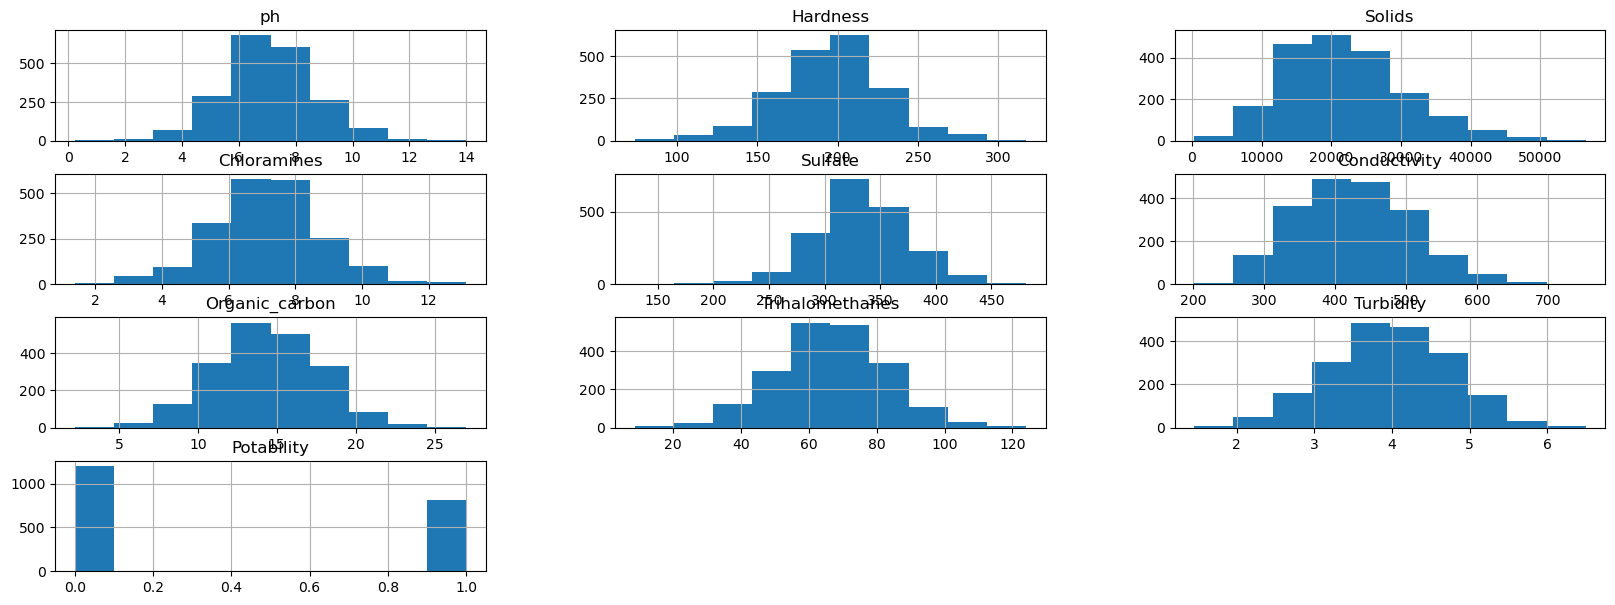

In [20]:
data.hist(figsize=(20,35),layout =(19,3) )
plt.show()

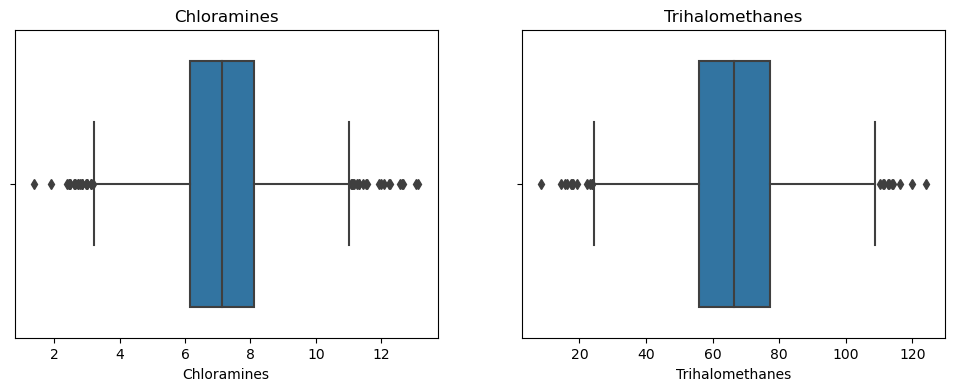

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Chloramines")
sns.boxplot(data["Chloramines"])
plt.subplot(1,2,2)
plt.title("Trihalomethanes")
sns.boxplot(data["Trihalomethanes"])
plt.show()

0.0    59.67
1.0    40.33
Name: Potability, dtype: float64

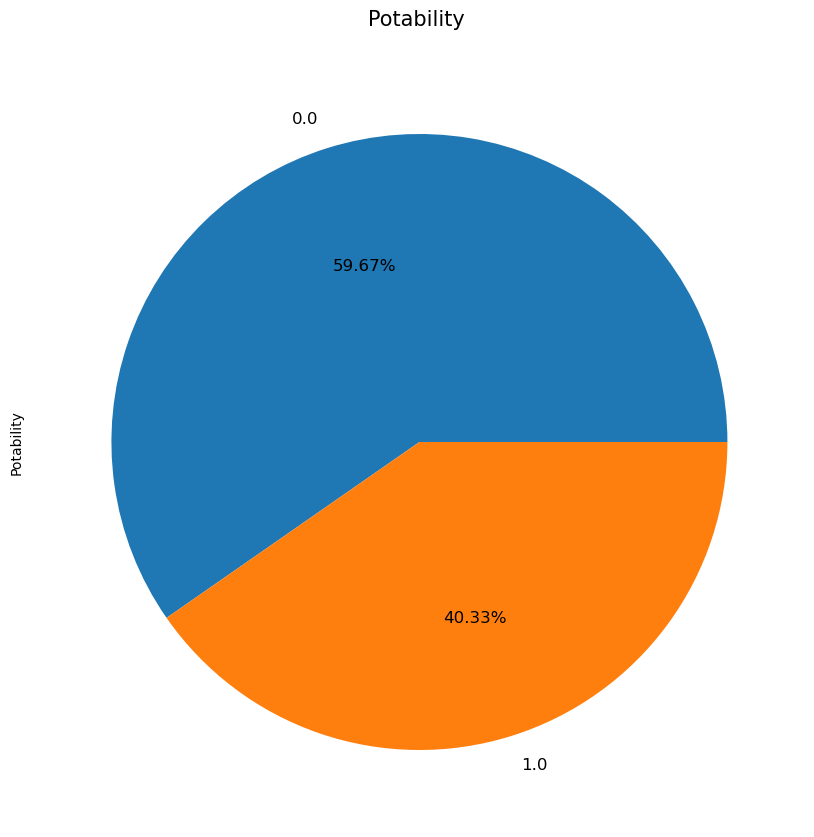

In [22]:
#Propagation by variable
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*100,2)

PropByVar(data, 'Potability')

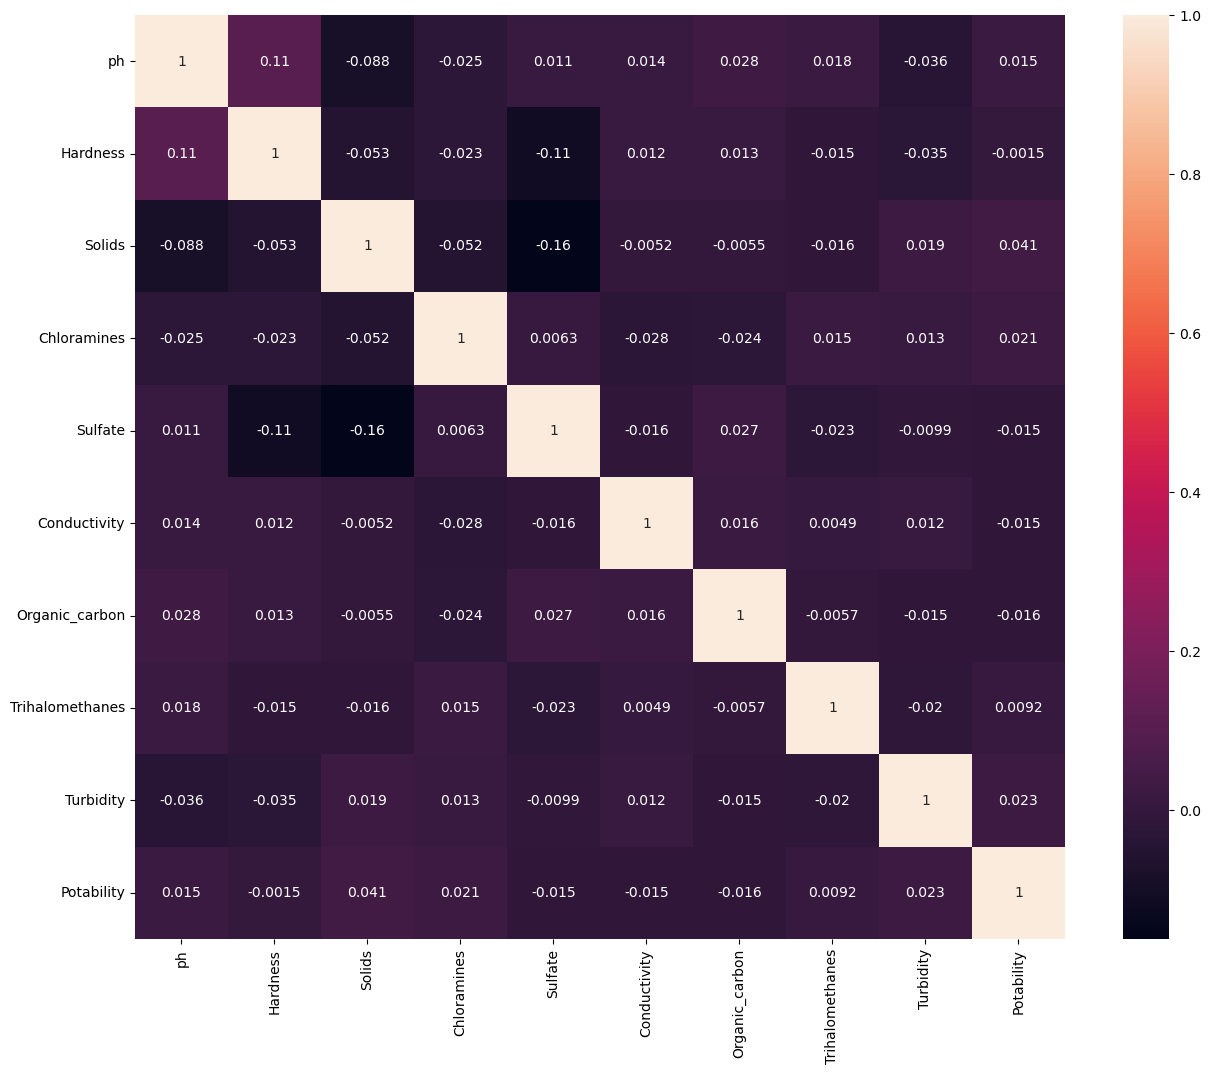

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot =True)
plt.show()

In [24]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
var = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
for i in var:
    data[i] = le.fit_transform(data[i])

In [27]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,1612,1463,1099,1481,1477,479,1795,1974,1610,0
4,1814,601,727,708,539,775,391,40,1109,0
5,316,786,1610,1212,886,39,73,456,67,0
6,1953,1904,1611,1199,1871,46,874,1767,97,0
7,1696,1197,339,102,429,1443,554,806,1420,0
